# Modifying a Matplotlib Figure

In this example, we will see how we can convert a Matplotlib's Plot to a Plotly Compatible `Figure` object.

Importing the dependencies:

In [1]:
%matplotlib inline 
import pprint
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Plotly
import plotly.plotly as py
import plotly.tools as tls

We will create a simple sine curve using Matplotlib. Then, we will convert it into Plotly's Figure object, and add another curve to the plot. Finally we will be able to plot the curve using Plotly.

In [2]:
## Generating the data..
x =  np.linspace(np.pi, 3*np.pi, 1000)
sinx = np.sin(x)
logx = np.log(x)

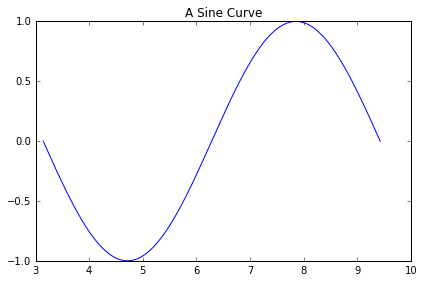

In [3]:
# Creating the matplotlib graph..
plt.plot(x, sinx)
plt.title('A Sine Curve')
plt.tight_layout()

Now we will convert the figure into Plotly compatible figure object using a utility method `mpl_to_plotly`.

In [4]:
help (tls.mpl_to_plotly)

Help on function mpl_to_plotly in module plotly.tools:

mpl_to_plotly(fig, resize=False, strip_style=False, verbose=False)
    Convert a matplotlib figure to plotly dictionary and send.
    
    All available information about matplotlib visualizations are stored
    within a matplotlib.figure.Figure object. You can create a plot in python
    using matplotlib, store the figure object, and then pass this object to
    the fig_to_plotly function. In the background, mplexporter is used to
    crawl through the mpl figure object for appropriate information. This
    information is then systematically sent to the PlotlyRenderer which
    creates the JSON structure used to make plotly visualizations. Finally,
    these dictionaries are sent to plotly and your browser should open up a
    new tab for viewing! Optionally, if you're working in IPython, you can
    set notebook=True and the PlotlyRenderer will call plotly.iplot instead
    of plotly.plot to have the graph appear directly in the

In [7]:
# Extracting Matplotlib Figure..
mpl_fig = plt.gcf()

In [8]:
# Converting to Plotly's Figure object..
plotly_fig = tls.mpl_to_plotly(mpl_fig)

ValueError: min() arg is an empty sequence

In [10]:
import matplotlib
import pprint
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go




u'https://plot.ly/~tarzzz/1287'

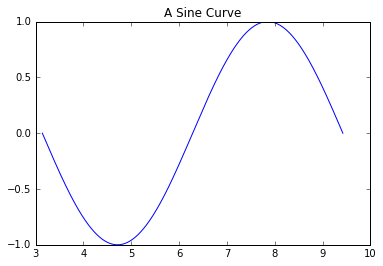

In [13]:
x =  np.linspace(np.pi, 3*np.pi, 1000)
sinx = np.sin(x)
logx = np.log(x)

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.plot(x, sinx)
ax.set_title('A Sine Curve')


In [15]:
# Converting to Plotly's Figure object..
plotly_fig = tls.mpl_to_plotly(mpl_fig)

In [20]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(plotly_fig['layout'])

{   'autosize': False,
    'height': 320,
    'hovermode': 'closest',
    'margin': {   'b': 40, 'l': 60, 'pad': 0, 'r': 47, 't': 31},
    'showlegend': False,
    'title': u'A Sine Curve',
    'titlefont': {   'color': '#000000', 'size': 12.0},
    'width': 480,
    'xaxis1': {   'anchor': 'y1',
                  'domain': [0.0, 1.0],
                  'mirror': 'ticks',
                  'nticks': 8,
                  'range': [3.0, 10.0],
                  'showgrid': False,
                  'showline': True,
                  'side': 'bottom',
                  'tickfont': {   'size': 10.0},
                  'ticks': 'inside',
                  'type': u'linear',
                  'zeroline': False},
    'yaxis1': {   'anchor': 'x1',
                  'domain': [0.0, 1.0],
                  'mirror': 'ticks',
                  'nticks': 5,
                  'range': [-1.0, 1.0],
                  'showgrid': False,
                  'showline': True,
                  'side': 'le

Now, we will supply some data to `plotly_fig`:

In [22]:
# Adding some new data points ..
plotly_fig['data'].append( dict(x=x, y=logx, type='scatter', mode='lines') )

Similarly, we can also edit the `Layout`. We will edit the Plot Title, and enable the grid here:

In [26]:
plotly_fig['layout']['title'] = 'Sine and Logarithmic Curve'

plotly_fig['layout']['xaxis1']['showgrid'] = True
plotly_fig['layout']['xaxis1']['autorange'] = True

plotly_fig['layout']['yaxis1']['showgrid'] = True
plotly_fig['layout']['yaxis1']['autorange'] = True

Now we can plot the modified figure using Plotly's Graphing API:


In [27]:
py.iplot(plotly_fig, filename='sine-and-logarithmic-plot')